# **Waze Project**
**Predicting User Churn with Python**

In this Python-based project, I'll dive into Waze's user data to predict user churn.

The project will cover:

**Exploratory Data Analysis**
- Analyzing the dataset to uncover insights, leveraging Python's libraries.

**Regression Modeling**
- Building a binomial logistic regression model with Python.

**Machine Learning Model Development**
- Employing Python to develop and assess machine learning models for accurate churn prediction.

# **Exploratory data analysis**

In this activity, I will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 Tasks:*

**Task 1:** Imports, links, and loading

**Task 2:** Data Exploration & Data cleaning

**Task 3:** Building visualizations

**Taks 4:** Evaluating and sharing results

<br/>



# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default figure size
plt.rcParams['figure.figsize'] = [10, 5]  # Adjust the width and height as needed

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Setup theme display
sns.set_theme(color_codes=True)

# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.3f}'.format

Read in the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('../data/waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?
> The purpose of this project is to conduct Exploratory Data Analysis (EDA), and we don't need to restructure or convert the existing data. However, for modeling purposes, we might need to convert the device variable, which contains categorical data, into dummy variables.

2. Are there any variables that have missing data?
> It appears that there is missing data in the `label` variable, which is considered as the predicted variable.

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







>1. Since we interest in the churn probability, the `label` variable is the essential variable. Other variables that represent the behavious of user are most variables.
>2. The `ID` column can be eliminated as they won't help to solve problem.
>3. With the `info()` function, we can check for missing data. We check `Non-Null Count` to identify which column have difference number with total rows.
>4. Check outliers:
>    - Boxplot visualization can help to check for outliers. Or
>    - Outliers = (data < lower_bound) | (data > upper_bound)

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748,2276,208,0,"2,628.845","1,985.775",28,19,Android
1,1,retained,133,107,326.897,1225,19,64,"13,715.921","3,160.473",13,11,iPhone
2,2,retained,114,95,135.523,2651,0,0,"3,059.149","1,610.736",14,8,Android
3,3,retained,49,40,67.589,15,322,7,913.591,587.197,7,3,iPhone
4,4,retained,84,68,168.247,1562,166,5,"3,950.202","1,219.556",27,18,Android


In [4]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,"14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000"
mean,"7,499.000",80.634,67.281,189.964,"1,749.838",121.606,29.673,"4,039.341","1,860.976",15.537,12.180
std,"4,329.983",80.699,65.914,136.405,"1,008.514",148.122,45.395,"2,502.149","1,446.702",9.005,7.824
min,0.000,0.000,0.000,0.220,4.000,0.000,0.000,60.441,18.282,0.000,0.000
25%,"3,749.500",23.000,20.000,90.661,878.000,9.000,0.000,"2,212.601",835.996,8.000,5.000
50%,"7,499.000",56.000,48.000,159.568,"1,741.000",71.000,9.000,"3,493.858","1,478.250",16.000,12.000
75%,"11,248.500",112.000,93.000,254.192,"2,623.500",178.000,43.000,"5,289.861","2,464.363",23.000,19.000
max,"14,998.000",743.000,596.000,"1,216.155","3,500.000","1,236.000",415.000,"21,183.402","15,851.727",31.000,30.000


And summary information using the `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
<class 'pandas.core

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

> What methods are best for identifying outliers?
> - Use numpy functions to investigate the mean() and median() of the data and understand range of data values
> - Use a boxplot to visualize the distribution of the data
> - Use histograms to visualize the distribution of the data
> - Calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

> How do you make the decision to keep or exclude outliers from any future models?
>  * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:
>     - *Delete them:* If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
>     - *Reassign them:* If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
>     - *Leave them:* For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



> In this exercise, we will use Box plot and Histogram to visualise and explain the data
> - Boxplot will be helpful to identify outliers, such as `sessions`, `drives`. 
> - Histogram will help us to understand the distribution of numerical data

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

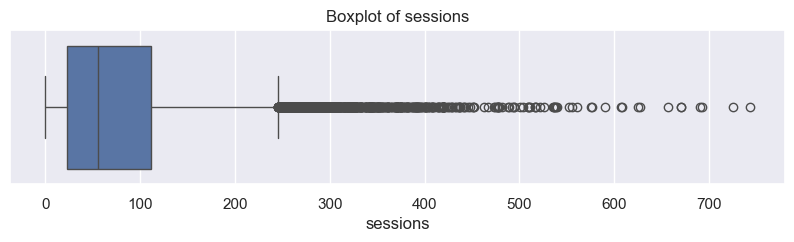

In [7]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['sessions'])
plt.title('Boxplot of sessions');

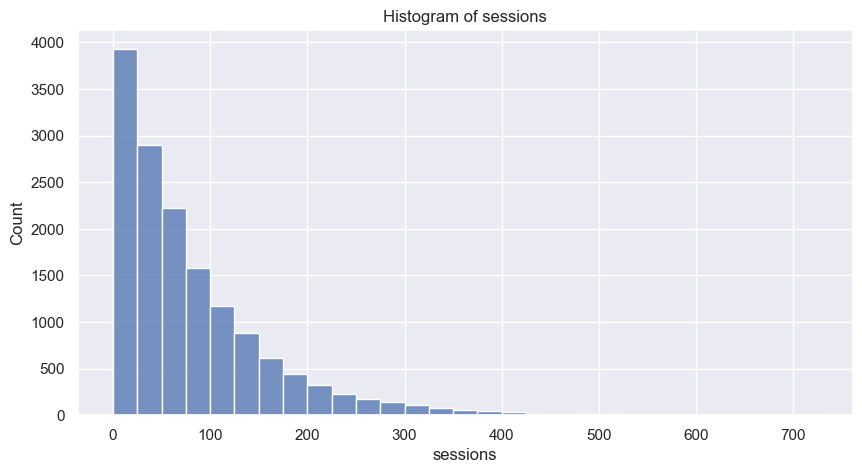

In [8]:
# Histogram
sns.histplot(x=df['sessions'],bins=range(0,750,25))
plt.title('Histogram of sessions');

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

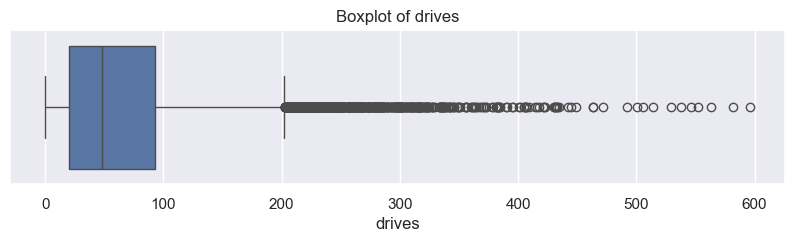

In [9]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['drives'])
plt.title('Boxplot of drives');

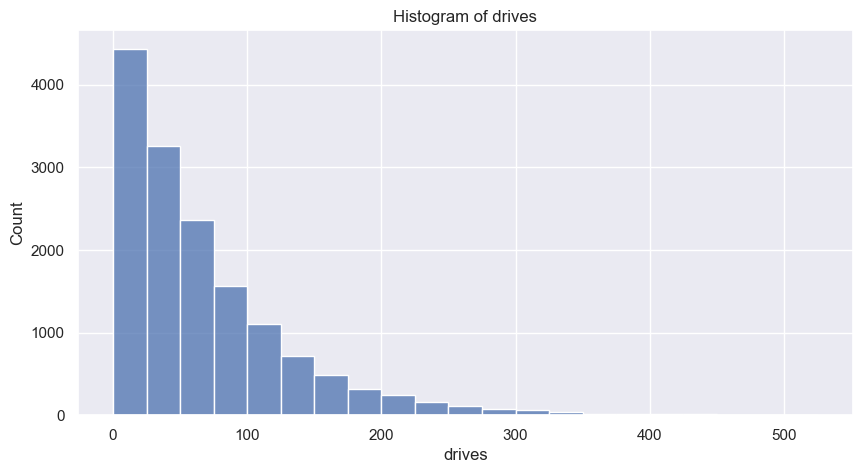

In [10]:
# Histogram
sns.histplot(x=df['drives'],bins=range(0,550,25))
plt.title('Histogram of drives');

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

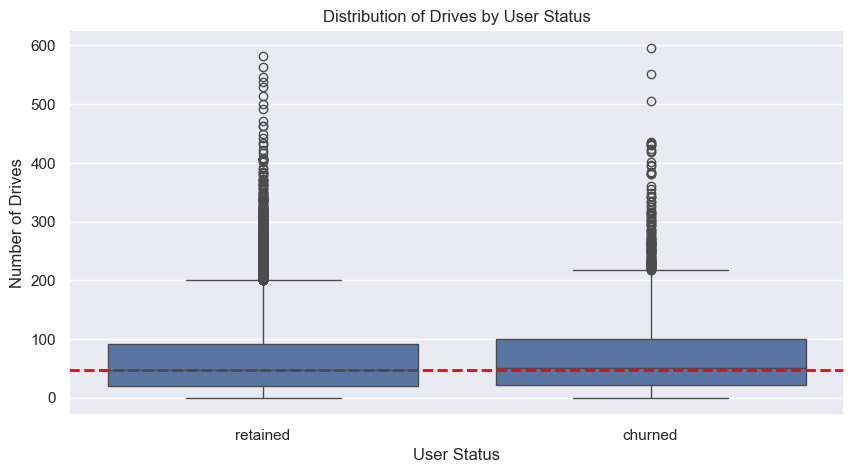

In [11]:
# Calculate the overall median
overall_median = df['drives'].median()

# Create a box plot
ax = sns.boxplot(x='label', y='drives', data=df)

# Set labels and title
plt.xlabel('User Status')
plt.ylabel('Number of Drives')
plt.title('Distribution of Drives by User Status');

# Draw a single median line
ax.axhline(overall_median, color='red', linestyle='dashed', linewidth=2, label='Overall Median');

<positron-console-cell-12>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.



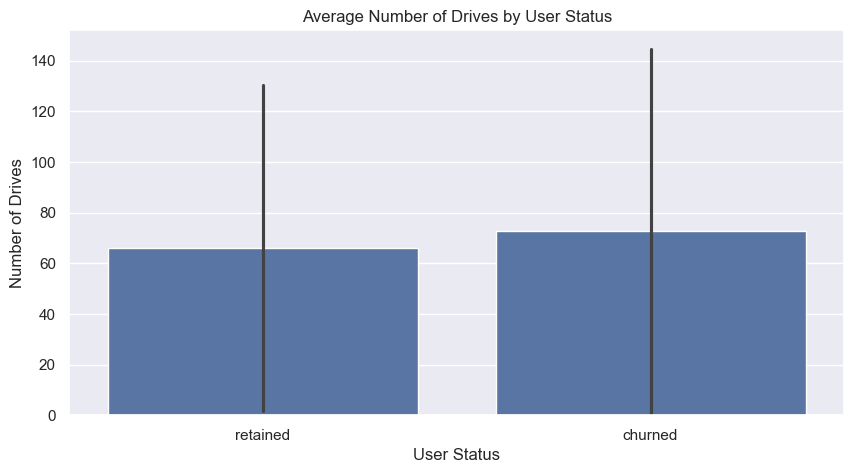

In [12]:
# Create a bar chart
sns.barplot(x='label', y='drives', data=df, ci='sd')  # ci='sd' adds error bars representing standard deviation

# Set labels and title
plt.xlabel('User Status')
plt.ylabel('Number of Drives')
plt.title('Average Number of Drives by User Status');

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

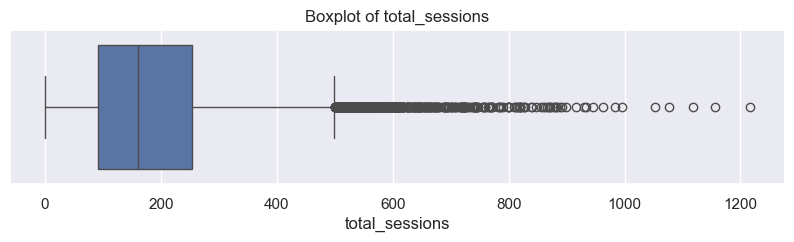

In [13]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['total_sessions'])
plt.title('Boxplot of total_sessions');

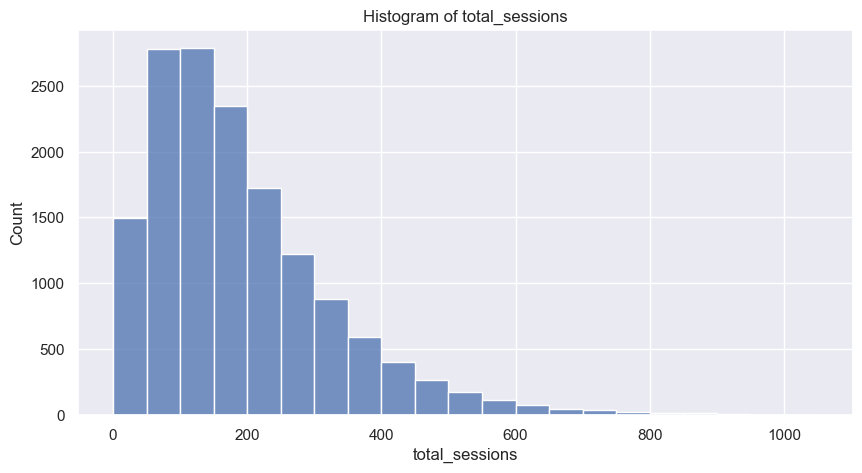

In [14]:
# Histogram
sns.histplot(x=df['total_sessions'],bins=range(0,1100,50))
plt.title('Histogram of total_sessions');

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

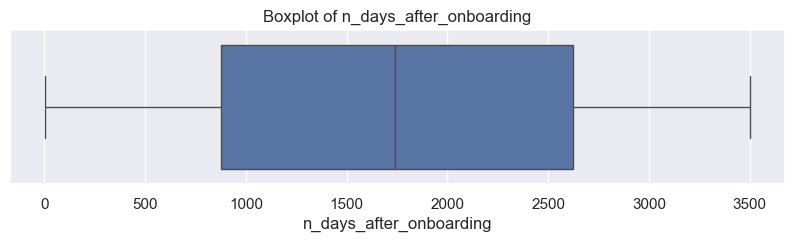

In [15]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['n_days_after_onboarding'])
plt.title('Boxplot of n_days_after_onboarding');

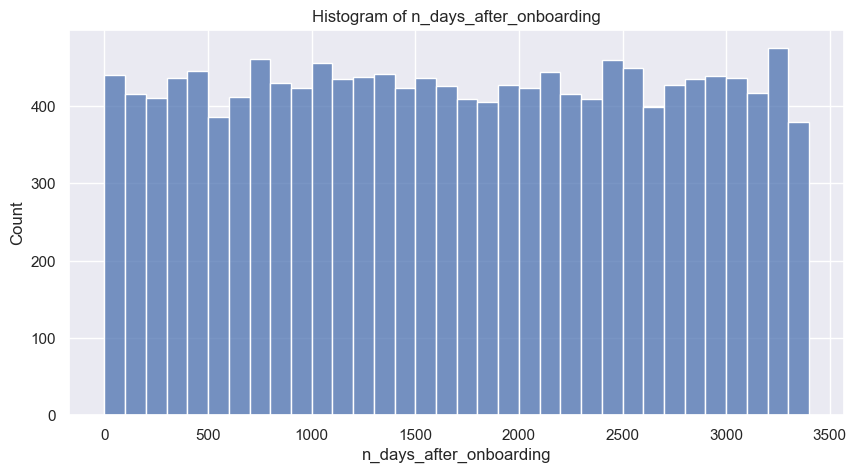

In [16]:
# Histogram
sns.histplot(x=df['n_days_after_onboarding'],bins=range(0,3500,100))
plt.title('Histogram of n_days_after_onboarding');

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

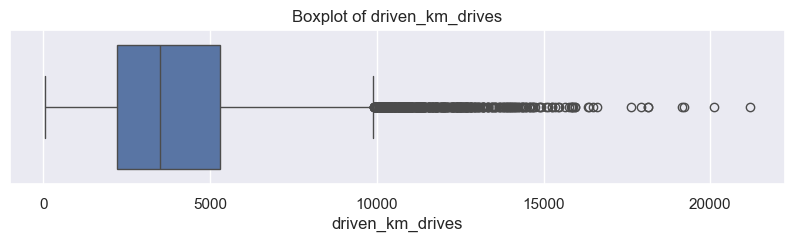

In [17]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['driven_km_drives'])
plt.title('Boxplot of driven_km_drives');

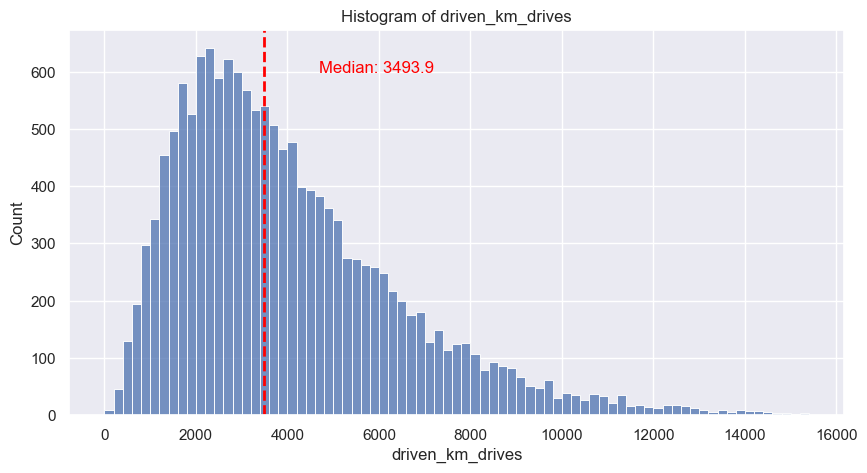

In [18]:
# Histogram
sns.histplot(x=df['driven_km_drives'],bins=range(0,15500,200))

# Add text annotation for the median value
median_value = round(df['driven_km_drives'].median(),1)
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)
plt.text(median_value*1.7, plt.ylim()[1]*0.9, f'Median: {median_value}', color='red', ha='center', va='center')

plt.title('Histogram of driven_km_drives');

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

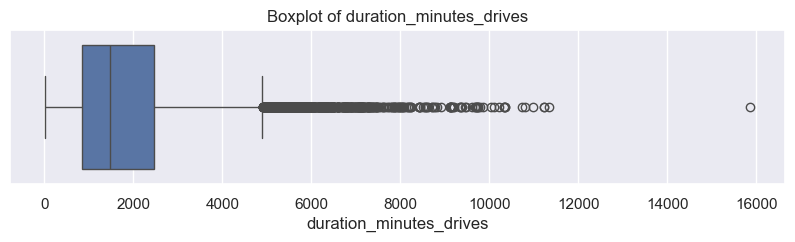

In [19]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['duration_minutes_drives'])
plt.title('Boxplot of duration_minutes_drives');

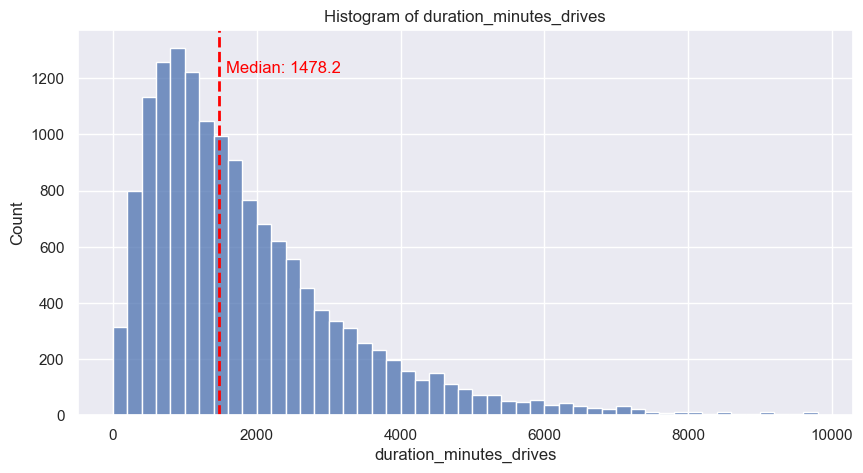

In [20]:
# Histogram
sns.histplot(x=df['duration_minutes_drives'],bins=range(0,10000,200))

# Add text annotation for the median value
median_value = round(df['duration_minutes_drives'].median(),1)
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)
plt.text(median_value*1.6, plt.ylim()[1]*0.9, f'Median: {median_value}', color='red', ha='center', va='center')

plt.title('Histogram of duration_minutes_drives');

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

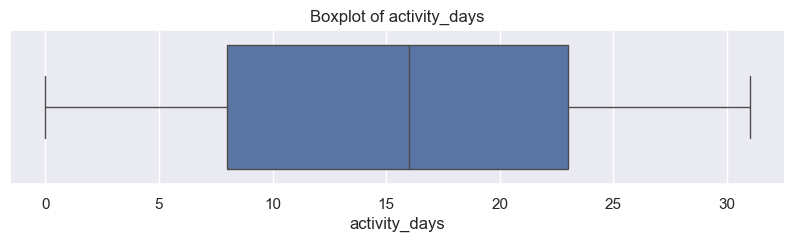

In [21]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['activity_days'])
plt.title('Boxplot of activity_days');

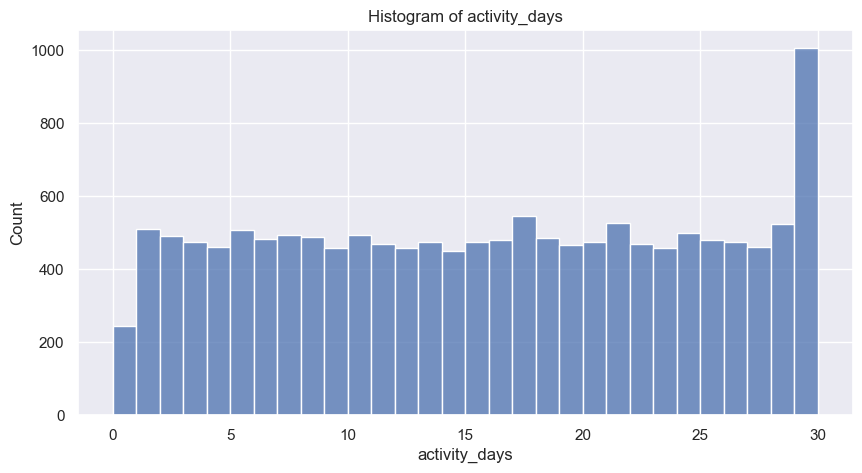

In [22]:
# Histogram
sns.histplot(x=df['activity_days'],bins=range(0,31,1))
plt.title('Histogram of activity_days');

::: {.callout-tip title="activity_days"}

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

:::

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

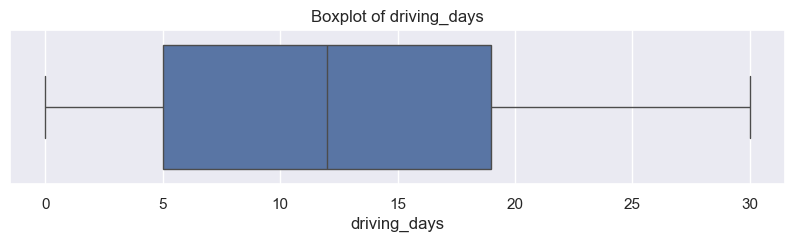

In [23]:
# Box plot
plt.figure(figsize=(10,2))
sns.boxplot(x=df['driving_days'])
plt.title('Boxplot of driving_days');

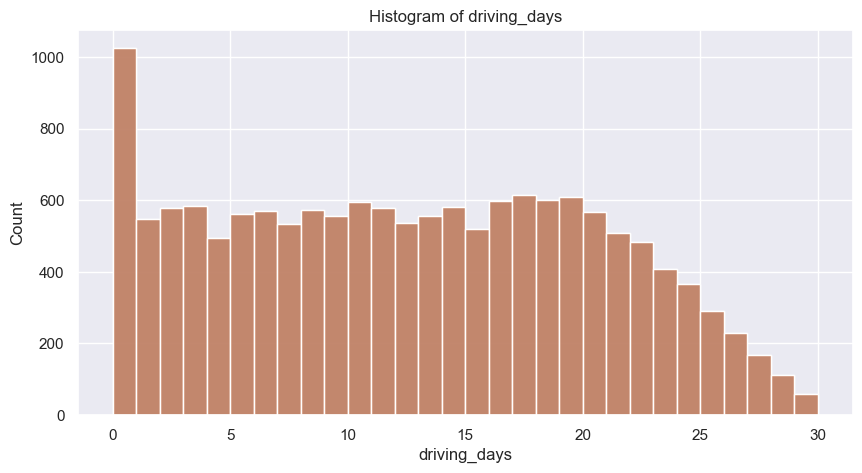

In [24]:
# Histogram
sns.histplot(x=df['driving_days'],bins=range(0,31,1))
plt.title('Histogram of driving_days');sns.histplot(x=df['driving_days'],bins=range(0,31,1))
plt.title('Histogram of driving_days');

::: {.callout-tip title="driving_days"}

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.
:::

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

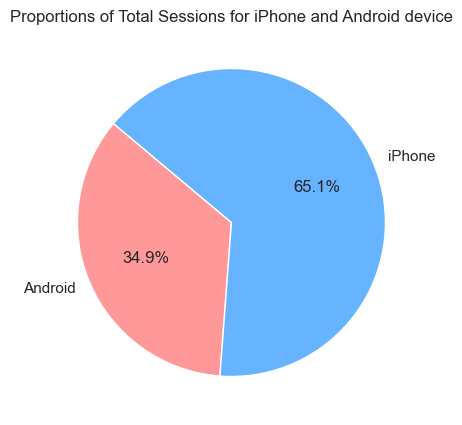

In [25]:
# Pie chart
df_device = df[['device', 'sessions']]

# Group by device and sum up the sessions
views_by_category = df.groupby('device')['sessions'].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(views_by_category, labels=views_by_category.index, autopct='%1.1f%%', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportions of Total Sessions for iPhone and Android device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

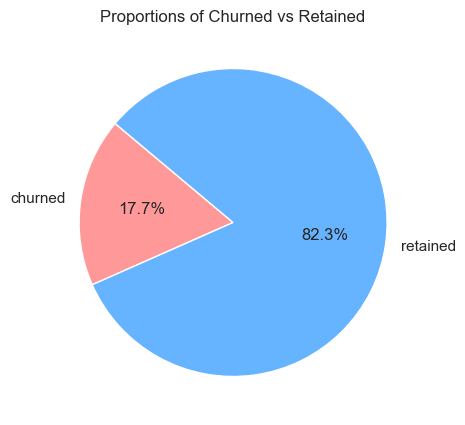

In [26]:
# Pie chart
# Group by 'label' and sum up the views
views_by_category = df.groupby('label').size()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(views_by_category, labels=views_by_category.index, autopct='%1.1f%%', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportions of Churned vs Retained')
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

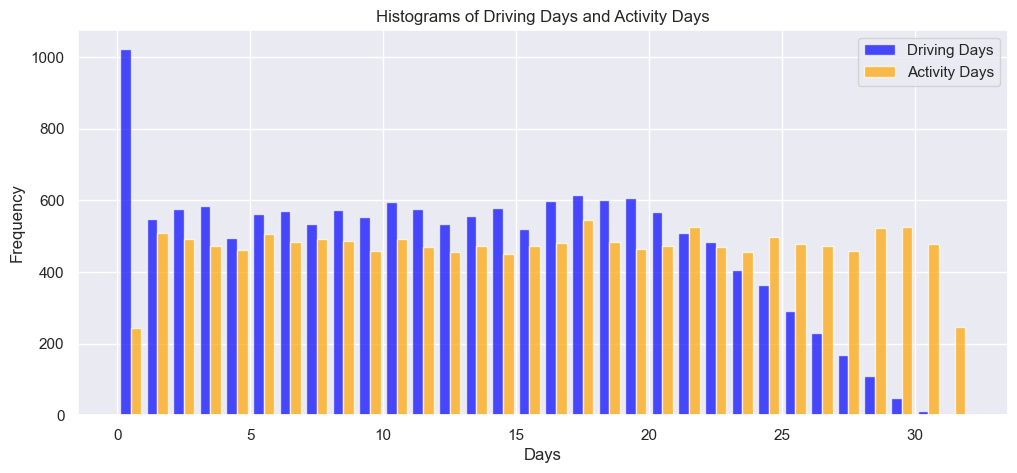

In [27]:
# Histogram
# Plot histograms for both variables
plt.figure(figsize=(12,5))

plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0, 33),
         alpha=0.7,  # Set alpha for transparency
         label=['Driving Days', 'Activity Days'],
         color=['blue', 'orange'])

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histograms of Driving Days and Activity Days')
plt.legend();

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [28]:
print('Max of driving_day:',df['driving_days'].max())
print('Max of activity_days:',df['activity_days'].max())

Max of driving_day: 30
Max of activity_days: 31
Max of driving_day: 30
Max of activity_days: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

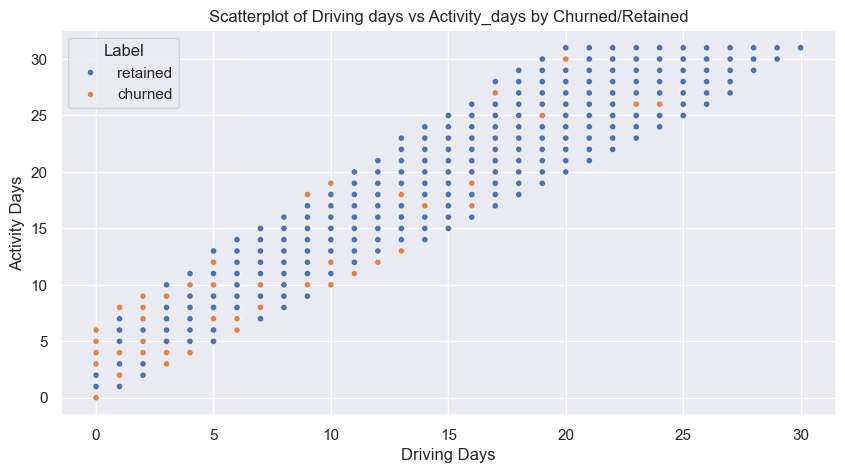

In [29]:
# Scatter plot
# Create a scatterplot
sns.scatterplot(x='driving_days', y='activity_days', 
                hue='label', data=df,
                s=20)

# Add labels and title
plt.title('Scatterplot of Driving days vs Activity_days by Churned/Retained')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')

# Show the legend
plt.legend(title='Label')

# Display the plot
plt.show();

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

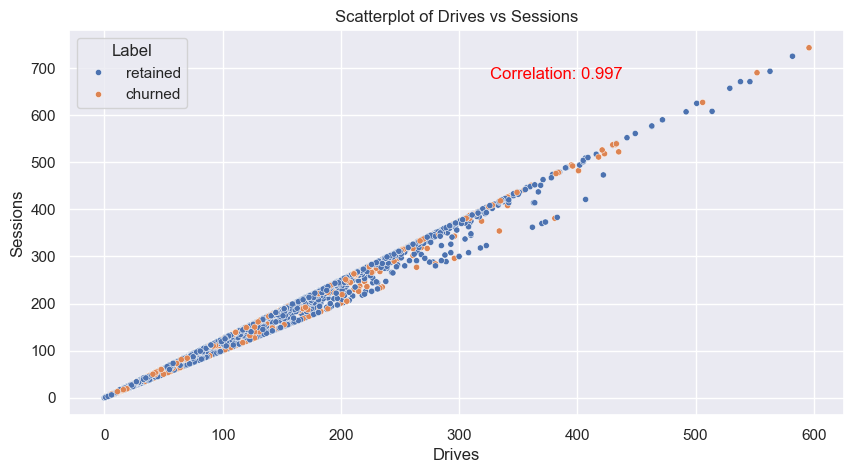

In [30]:
# Create a scatterplot drives and sessions
sns.scatterplot(x='drives', y='sessions', 
                hue='label', data=df,
                s=20)

# Add labels and title
plt.title('Scatterplot of Drives vs Sessions')
plt.xlabel('Drives')
plt.ylabel('Sessions')

# Calculate the correlation coefficient
correlation_coefficient = df['drives'].corr(df['sessions'])

# Display the correlation coefficient on the plot
plt.text(plt.xlim()[1] * 0.7, plt.ylim()[1] * 0.9, f'Correlation: {correlation_coefficient:.3f}', 
         color='red', ha='right', va='top')

# Show the legend
plt.legend(title='Label');

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

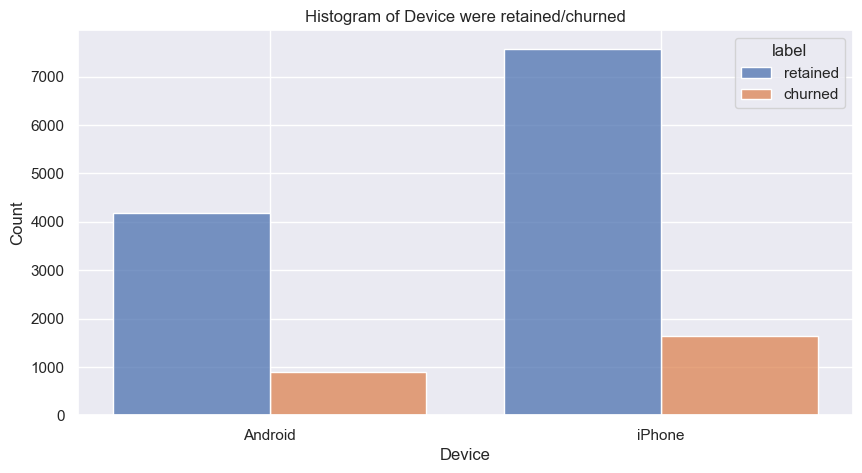

In [31]:
# Histogram
# Create a bar plot with four bars to show how many iPhone users were retained/churned and how many Android users were retained/churned.
sns.histplot(data=df, x='device', hue='label', 
             multiple='dodge', shrink=0.8)

plt.title('Histogram of Device were retained/churned')
plt.xlabel('Device')
plt.ylabel('Count')

# Show the plot
plt.show()

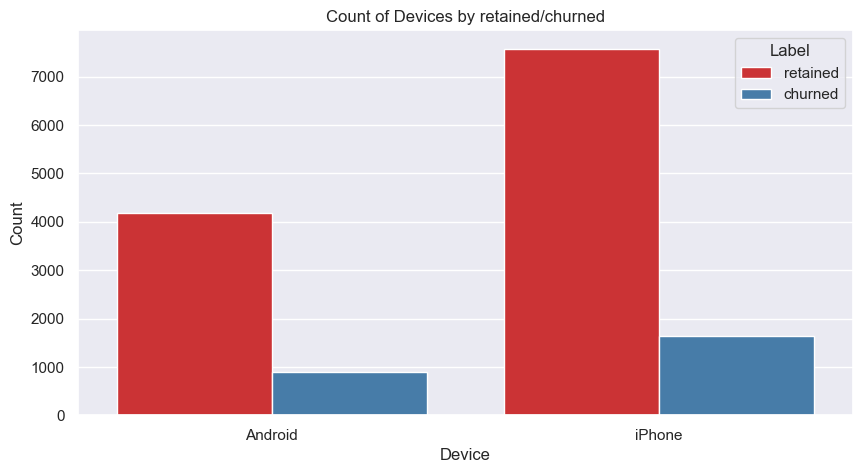

In [32]:
# Grouped bar plot for each Devices and Retained/Churned status
sns.countplot(data=df, x='device', hue='label', 
              palette='Set1')

plt.title('Count of Devices by retained/churned')
plt.xlabel('Device')
plt.ylabel('Count')
plt.legend(title='Label');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [33]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count   14,999.000
mean           inf
std            NaN
min          3.022
25%        167.280
50%        323.146
75%        757.926
max            inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [34]:
# 1. Convert infinite values to zero
# Replace infinity with zero
df['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count   14,999.000
mean       578.963
std      1,030.094
min          0.000
25%        136.239
50%        272.889
75%        558.687
max     15,420.234
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

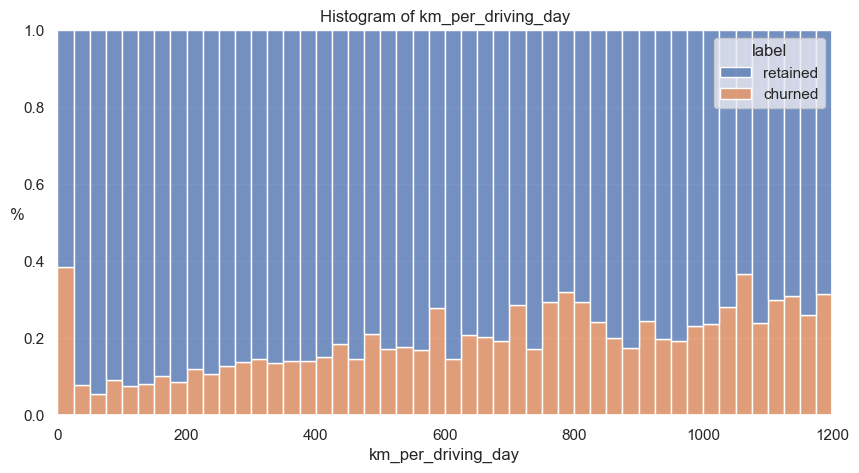

In [35]:
# Histogram
sns.histplot(data=df, 
             x='km_per_driving_day',hue='label',
             multiple='fill',
             bins=range(0,1201,25))
plt.ylabel('%',rotation=0)
plt.title('Histogram of km_per_driving_day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

::: {.callout-tip title="Distance driven per driving day"}

*Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn.*
:::

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

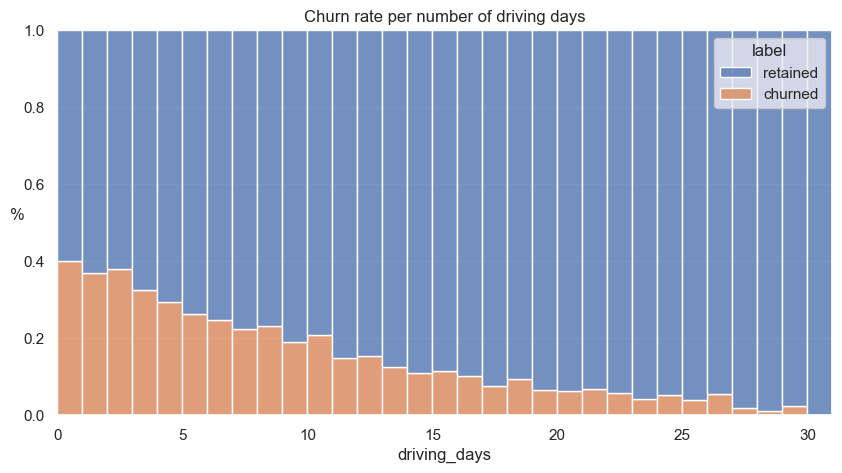

In [36]:
# Histogram
sns.histplot(data=df, 
             x='driving_days',hue='label',
             multiple='fill',
             bins=range(0,32,1))
plt.ylabel('%',rotation=0)
plt.title('Churn rate per number of driving days');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. ***If people who used the app a lot churned, it would likely indicate dissatisfaction.*** When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [37]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month']=df['sessions']/df['total_sessions']

What is the median value of the new column?

In [38]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

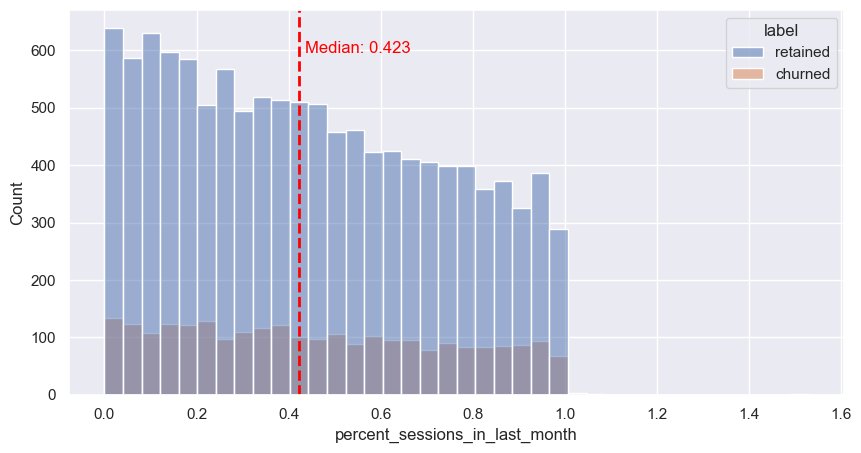

In [39]:
# Histogram
sns.histplot(data=df, 
             x='percent_sessions_in_last_month',hue='label')
# Add median line
median_value = df['percent_sessions_in_last_month'].median()
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.text(median_value*1.3, plt.ylim()[1]*0.9, f'Median: {median_value:.3f}', color='red', ha='center', va='center');

Check the median value of the `n_days_after_onboarding` variable.

In [40]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

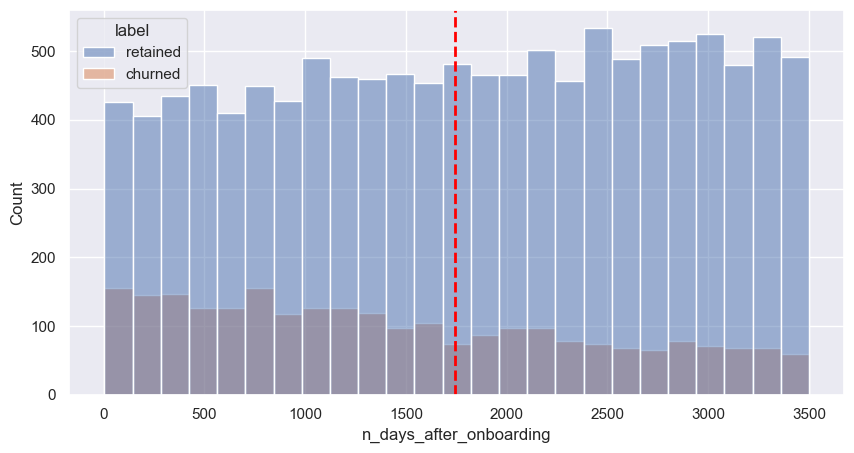

In [41]:
# Histogram
sns.histplot(data=df, 
             x='n_days_after_onboarding',hue='label')
# Add median line
median_value = df['n_days_after_onboarding'].median()
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median');

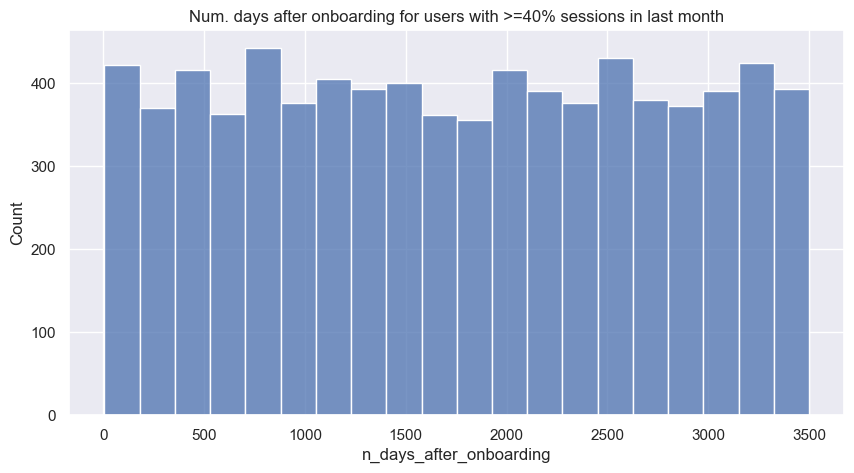

In [42]:
# Histogram
view_df = df[df['percent_sessions_in_last_month']>0.4]

sns.histplot(view_df['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [43]:
def impute_outliers_with_percentile(column_name,percentile):
    # Calculate the percentile threshold and number of outliers
    threshold = round(np.percentile(df[column_name],percentile),1)
    outliers = (df[column_name]> threshold).sum()
    
    # Impute values greater than the percentile with the percentile value (threshold)
    df[column_name] = np.where(df[column_name] > threshold, threshold, df[column_name])
    
    print ('{:>25} | percentile: {} | threshold: {} | # outliers: {}'.format(column_name, percentile, threshold, outliers))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [44]:
impute_outliers_with_percentile('sessions',95)
impute_outliers_with_percentile('drives',95)
impute_outliers_with_percentile('total_sessions',95)
impute_outliers_with_percentile('driven_km_drives',95)
impute_outliers_with_percentile('duration_minutes_drives',95)

                 sessions | percentile: 95 | threshold: 243.0 | # outliers: 747
                   drives | percentile: 95 | threshold: 201.0 | # outliers: 741
           total_sessions | percentile: 95 | threshold: 454.4 | # outliers: 750
         driven_km_drives | percentile: 95 | threshold: 8889.8 | # outliers: 750
  duration_minutes_drives | percentile: 95 | threshold: 4668.9 | # outliers: 750
                 sessions | percentile: 95 | threshold: 243.0 | # outliers: 747
                   drives | percentile: 95 | threshold: 201.0 | # outliers: 741
           total_sessions | percentile: 95 | threshold: 454.4 | # outliers: 750
         driven_km_drives | percentile: 95 | threshold: 8889.8 | # outliers: 750
  duration_minutes_drives | percentile: 95 | threshold: 4668.9 | # outliers: 750


Call `describe()` to see if your change worked.

In [45]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,"14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000","14,999.000"
mean,"7,499.000",76.569,64.058,184.033,"1,749.838",121.606,29.673,"3,939.633","1,789.647",15.537,12.180,578.963,0.449
std,"4,329.983",67.298,55.307,118.605,"1,008.514",148.122,45.395,"2,216.042","1,222.705",9.005,7.824,"1,030.094",0.287
min,0.000,0.000,0.000,0.220,4.000,0.000,0.000,60.441,18.282,0.000,0.000,0.000,0.000
25%,"3,749.500",23.000,20.000,90.661,878.000,9.000,0.000,"2,212.601",835.996,8.000,5.000,136.239,0.196
50%,"7,499.000",56.000,48.000,159.568,"1,741.000",71.000,9.000,"3,493.858","1,478.250",16.000,12.000,272.889,0.423
75%,"11,248.500",112.000,93.000,254.192,"2,623.500",178.000,43.000,"5,289.861","2,464.363",23.000,19.000,558.687,0.687
max,"14,998.000",243.000,201.000,454.400,"3,500.000","1,236.000",415.000,"8,889.800","4,668.900",31.000,30.000,"15,420.234",1.531


### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



::: {.callout-note title="I have learned ..."}

- There is missing data on label variable. It might need futher processing to with predictive analytis.
- There are many outliers observations with drives, then we might consider data transformation to stabilize the variations.
- The number of drives and number of sessions are strongly correlation. It may be redundant when we run the model.
- On average, retained users have fewer drives than churned users

:::


My other questions are ....

My client would likely want to know ...


Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [46]:
### YOUR CODE HERE ###


In [47]:
### YOUR CODE HERE ###


### **Task 4b. Conclusion**

Now that we have explored and visualized Waze data, the next step is to share the findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as we need to  prepare to write your executive summary. Think about key points we may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?
> Many variables exhibit a right-skewed distribution, while some follow a uniform distribution. 
> - In a right-skewed distribution, the variable tends to have higher values on the right end and lower values toward the left. For right-skewed distributions, the majority of data points cluster on the lower end of the range, with fewer points extending toward higher values. 
> - In contrast, in uniform distributions, values are equally likely to occur across the entire range of the variable, resulting in a more balanced spread of data points.

2. Was there anything that led you to believe the data was erroneous or problematic in any way?
> Identifying problematic data involves assessing its quality, consistency, and reliability. Here are some common signs that data might be problematic:
> - **Inconsistencies:** Inconsistent data entries or formats across records or columns can be a sign of data quality issues.
>    - *Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*
> - **Missing Values:** High levels of missing data can impact the reliability of your analysis. Understanding the reasons for missing data is crucial.
>    - *Missing value with `label` variable - which is target variable in dataset*
> - **Outliers:** Unusual values that deviate significantly from the majority of the data might be errors or outliers. Investigate these values to ensure they are not affecting your analysis inappropriately.
>    - *Several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`.*
> - **Duplicates:** Duplicate records can skew results. Check for and handle duplicate entries appropriately.
> - **Data Distribution:** Evaluate the distribution of data. Skewed or unusual distributions might indicate errors or anomalies.
> - **Data Source Reliability:** Consider the source of the data. Data from unreliable sources or poorly maintained databases can be problematic.
> - **Data Consistency:** Ensure that data adheres to defined standards. For example, dates should be in a consistent format, and categorical variables should have consistent labels.
> - **Data Validation:** Cross-reference data with external sources or conduct internal consistency checks to validate its accuracy.
> - **Historical Changes:** If the data has changed over time, understand when and why those changes occurred. Sudden shifts or irregular patterns may signal problems.
> - **Documentation:** Lack of documentation about the data's source, collection methods, or any transformations applied can make it challenging to assess its reliability.
> - **Feedback from Users:** If users or analysts who work with the data regularly have concerns or report issues, it's essential to investigate and address those concerns.
>

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
> Regarding the different of max value in `activity_days` and `driving_days` we would like to check of collection of those data is in the same month or not.

4. What percentage of users churned and what percentage were retained?
> About 18% of users churned and ~ 82% of users retained.

5. What factors correlated with user churn? How?
> Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who **drove more days of the last month were less likely to churn**.

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE


